In [4]:
import sys
sys.path.append('..') 

from keithleyAPI import Communications
from tests_ import sensing_test_egofet,stability_test_egofet
import utils

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
smu = Communications("TCPIP0::169.254.181.21::1225::SOCKET")
smu.connect()
smu._instrument_object.write_termination = "\0"
smu._instrument_object.read_termination = "\0"

In [3]:
DUT = 'd030824-II' # device under test
couple = 'r3c1'
G = 'CH1'
S = 'CH3'
D = 'CH2'

In [4]:
smu.query("BC") # clears all readings from buffer

'ACK'

# EGOFET Test

### To run a cell and go to the next one: Shift + enter
#### Run the following cell until it prints out "Device correctly stabilized"
Be sure to change the device under test on the last line

In [5]:
diode_df = []
mean_diff = []
TOT = 'EGOFET_StabilityforIonSensing-Na' #type of test

### Run Stability Check before sensing test

In [6]:
vds = '-5'
compliance_vds = '0.1'
vg_start = '1'
vg_stop = '-1'
vg_step = '-0.1'
compliance_vg ='0.1'
speed = '1'


In [ ]:
diode_df, mean_diff = stability_test_egofet(G, S, D, smu,vgsids, mean_diff, couple, DUT, TOT, max_steps = 20, resting_time = 10, slope_point = None)

### Sensing

### Run the following 2 cells ONLY ONCE

In [ ]:
meandiff = []
stddiff = []
diode_dict_list = {} # dictionary where to store the list with the 20 sweeps of all the concentrations
diode_df_dict = {} # dictionary where to store the df with the 20 sweeps of all the concentrations
mean_std = [] #list where to store the mean and std of the òast 5 values of the last Nvalidsteps

baseline = 0

In [ ]:
k = 0 # 10pM
# change conc accordingly to the specific sensing test you would like to  run
conc = ['baseline','1pM','10pM','100pM','1nM','10nM','100nM','1uM']

### Run all the following cells until 'END' every time you change concentration

In [ ]:
TOT = '' #Type Of Test
k, diode_df_dict, diode_dict_list, mean_std, calibrated_response, folder, baseline = sensing_test_egofet(G, S, D, smu,k, conc, egofet_df_list, egofet_dict_list, mean_std,DUT, TOT, couple, baseline, resting_time = 10, slope_point = None):

In [ ]:
# printing the mean and the std of the last 5 values of the 20 sweeps. Each [] represents a concentration

# plotting change of MAx values in time for different concentrations
TOT = ''
utils.plot_max_values(calibrated_response,conc,couple,1,DUT,TOT, mode = 4, folder)

In [ ]:
# std and mean only for the diff

In [ ]:
plt.scatter(conc[:k], [i[0]*1000 for i in mean_std] )
plt.errorbar(conc[:k], [i[0]*1000 for i in mean_std], yerr=[i[1]*1000 for i in mean_std], label='std')

plt.xlabel('Concentration')
plt.ylabel('DeltaV [mV]')
plt.title('Mean and Std DeltaV dor different concentrations')
plt.legend()
plt.grid()
plt.savefig(folder+"\mean_std"+couple+".png",bbox_inches='tight', dpi = 1200) 


### end

In [9]:
#calibrated_response.append(calibrated_response)
data = pd.DataFrame()
vgsids = []
calibrated_response = []
mean_std =  []
Nvalidsteps = 3
data['Vgs'] = np.arange(20)
data['Ids'] = data['Vgs']**3
for j in range(3):
    for i in range(20):
        vgsids.append(data)
    calibrated_response.append(utils.calibrated_response_egofet(vgsids[j],slope_point = 1))
    mean_std.append([np.mean(calibrated_response[-1][-Nvalidsteps:]),np.std(calibrated_response[-1][-Nvalidsteps:])])
calibrated_response = [pd.Series(i) for i in calibrated_response]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


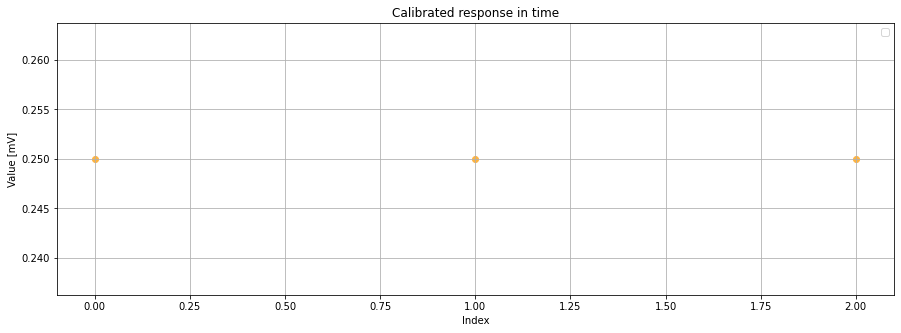

In [8]:
utils.plot_max_values(calibrated_response,['p'],'i',1,'','', mode = 4)